In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [51]:
df = pd.read_csv('bikes_rent.csv')
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [52]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [53]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

df['predictions'] = y_pred

df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,predictions
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985,1921.957637
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801,1404.804102
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349,1539.257987
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562,1761.737216
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600,2034.915487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114,2736.156071
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095,3189.847321
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341,3004.419150
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796,2965.028525


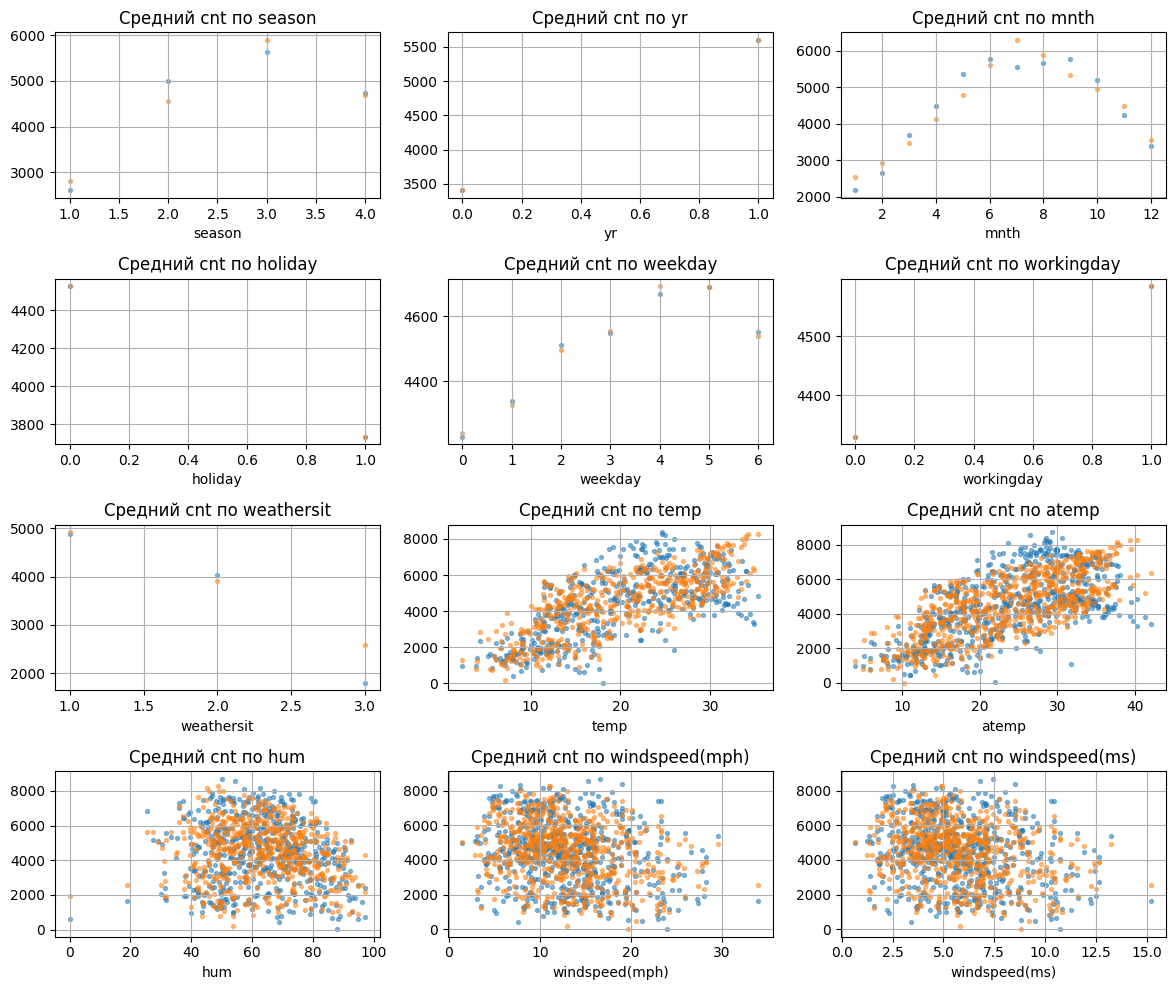

In [54]:
features = [
    "season",
    "yr",
    "mnth",
    "holiday",
    "weekday",
    "workingday",
    "weathersit",
    "temp",
    "atemp",
    "hum",
    "windspeed(mph)",
    "windspeed(ms)",
]
fig, axes = plt.subplots(4, 3, figsize=(12, 10))

axes = axes.ravel()

for i, column in enumerate(features):
    ax = axes[i]

    data1 = df.groupby(column).cnt.mean().reset_index()
    data2 = df.groupby(column).predictions.mean().reset_index()
    ax.scatter(data1[column], data1["cnt"], alpha=0.5, s=8)
    ax.scatter(data2[column], data2["predictions"], alpha=0.5, s=8)
    ax.set_xlabel(column)
    ax.set_title(f"Средний cnt по {column}")
    ax.grid()


plt.tight_layout()
plt.show()